# Demo 07

In [21]:
import nltk

import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 10)

## TF-IDF for Inaugaural Addresses

#### Making Document-Matrix with Sklearn

In yesterday's demo we used nltk's [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to
> Convert a collection of text documents to a matrix of token counts

Today's demo will use nltk's [TfidfVectorize](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to
> Convert a collection of raw documents to a matrix of TF-IDF features.

In [7]:
# Create a new TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english') 

**Question:** What are these options of `input='filename'` and `stop_words='english'`?

Let's read the documentation in the Contextual help

Let's get the list of speeches

In [3]:
Speeches_path = "data/inaugural_speeches/"

Stores the titles of the speeches, we will use this information later

In [4]:
titles = [title.strip(".txt") for title in os.listdir(Speeches_path)]
" ".join(titles)

'1797-John_Adams 1937-Franklin_D._Roosevel 1961-John_F._Kennedy 1901-William_McKinley 1957-Dwight_Eisenhower 1805-Thomas_Jefferson 1921-Warren_G._Harding 1865-Abraham_Lincoln 1917-Woodrow_Wilson 1985-Ronald_Reagan 1853-Franklin_Pierce 1861-Abraham_Lincoln 1981-Ronald_Reagan 1833-Andrew_Jackson 1837-Martin_Van_Buren 1881-James_A._Garfield 1873-Ulysses_S._Gran 1877-Rutherford_B._Hayes 2005-George_W._Bush 1849-Zachary_Taylor 1973-Richard_Nixon 1933-Franklin_D._Roosevel 1965-Lyndon_Johnson 2001-George_W._Bush 1989-George_H.W._Bush 1825-John_Quincy_Adams 1977-Jimmy_Carter 1829-Andrew_Jackson 1889-Benjamin_Harrison 1905-Theodore_Roosevel 1913-Woodrow_Wilson 1809-James_Madison 1969-Richard_Nixon 1997-Bill_Clinton 1993-Bill_Clinton 1793-George_Washington 1885-Grover_Cleveland 1817-James_Monroe 1941-Franklin_D._Roosevel 1953-Dwight_Eisenhower 1893-Grover_Cleveland 1821-James_Monroe 1845-James_Polk 1841-William_Henry_Harrison 1949-Harry_Truman 1897-William_McKinley 1929-Herbert_Hoover 1801-Thoma

This list compression will create the paths to the speech files

*Not for in class: show students how to hide output of a Jupytercell*

In [5]:
[Speeches_path + fname for fname in os.listdir(Speeches_path)]

['data/inaugural_speeches/1797-John_Adams.txt',
 'data/inaugural_speeches/1937-Franklin_D._Roosevelt.txt',
 'data/inaugural_speeches/1961-John_F._Kennedy.txt',
 'data/inaugural_speeches/1901-William_McKinley.txt',
 'data/inaugural_speeches/1957-Dwight_Eisenhower.txt',
 'data/inaugural_speeches/1805-Thomas_Jefferson.txt',
 'data/inaugural_speeches/1921-Warren_G._Harding.txt',
 'data/inaugural_speeches/1865-Abraham_Lincoln.txt',
 'data/inaugural_speeches/1917-Woodrow_Wilson.txt',
 'data/inaugural_speeches/1985-Ronald_Reagan.txt',
 'data/inaugural_speeches/1853-Franklin_Pierce.txt',
 'data/inaugural_speeches/1861-Abraham_Lincoln.txt',
 'data/inaugural_speeches/1981-Ronald_Reagan.txt',
 'data/inaugural_speeches/1833-Andrew_Jackson.txt',
 'data/inaugural_speeches/1837-Martin_Van_Buren.txt',
 'data/inaugural_speeches/1881-James_A._Garfield.txt',
 'data/inaugural_speeches/1873-Ulysses_S._Grant.txt',
 'data/inaugural_speeches/1877-Rutherford_B._Hayes.txt',
 'data/inaugural_speeches/2005-George

Now lets create our Document-Term matrix where features are TF-IDF counts

In [8]:
tfidf_vector = tfidf_vectorizer.fit_transform([Speeches_path + fname for fname in os.listdir(Speeches_path)])
tfidf_vector

<55x8643 sparse matrix of type '<class 'numpy.float64'>'
	with 34675 stored elements in Compressed Sparse Row format>

Let's read contextual help for `.fit_transform`

**Question:** Let's find the size of the matrix, i.e. how many rows and how many columns

In [9]:
type(tfidf_vector)

scipy.sparse.csr.csr_matrix

In [10]:
tfidf_vector.shape

(55, 8643)

In [ ]:
tfidf_vector.shape

**Answer:**

Let's store the Document-Word Matrix of TF-IDF values into a DataFrame

In [11]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray())
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,8633,8634,8635,8636,8637,8638,8639,8640,8641,8642
0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.026393,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.036365,0.046371,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.028180,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.058572,0.000000,0.0,0.0412,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
51,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.035427,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
52,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
53,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Let's clean up the dataframe to add appropriate columns names and indices

In [12]:
# Makes the indices of the dataframe the titles of the speeches
tfidf_df.index = titles
# makes the names of the columns the word types
tfidf_df.columns = tfidf_vectorizer.get_feature_names()   
tfidf_df

,000,100,120,125,13,14th,15th,16,1774,1776,...,yorktown,young,younger,youngest,youth,youthful,zeal,zealous,zealously,zone
1797-John_Adams,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.026393,0.0,0.0,0.0
1937-Franklin_D._Roosevel,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1961-John_F._Kennedy,0.036365,0.046371,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.028180,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1901-William_McKinley,0.058572,0.000000,0.0,0.0412,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1957-Dwight_Eisenhower,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813-James_Madison,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1869-Ulysses_S._Gran,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.035427,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1925-Calvin_Coolidge,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1857-James_Buchanan,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Distinctive Words

Sometimes we know what words are indicative of specific things we want to quantify.


In [13]:
tfidf_slice = tfidf_df[['government', 'borders', 'people', 'war', 'honor','foreign', 'men', 'women', 'children']]
tfidf_slice.sort_index().round(decimals=2)

,government,borders,people,war,honor,foreign,men,women,children
1789-George_Washington,0.12,0.00,0.05,0.00,0.00,0.00,0.02,0.00,0.00
1793-George_Washington,0.06,0.00,0.06,0.00,0.09,0.00,0.00,0.00,0.00
1797-John_Adams,0.16,0.00,0.19,0.01,0.10,0.12,0.05,0.00,0.00
1801-Thomas_Jefferson,0.16,0.00,0.03,0.02,0.04,0.00,0.04,0.00,0.00
1805-Thomas_Jefferson,0.03,0.00,0.00,0.02,0.00,0.06,0.01,0.00,0.02
...,...,...,...,...,...,...,...,...,...
1989-George_H.W._Bush,0.05,0.00,0.06,0.03,0.00,0.01,0.04,0.08,0.07
1993-Bill_Clinton,0.05,0.00,0.13,0.03,0.00,0.02,0.01,0.03,0.06
1997-Bill_Clinton,0.09,0.00,0.09,0.01,0.00,0.00,0.00,0.02,0.10
2001-George_W._Bush,0.05,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.09


Let's determine the most distinctive terms for each Inaugrual Address

In [16]:
doc_word_tfidf_df = tfidf_df.stack().reset_index()
doc_word_tfidf_df

,level_0,level_1,0
0,1797-John_Adams,000,0.0
1,1797-John_Adams,100,0.0
2,1797-John_Adams,120,0.0
3,1797-John_Adams,125,0.0
4,1797-John_Adams,13,0.0
...,...,...,...
475360,1909-William_Howard_Taf,youthful,0.0
475361,1909-William_Howard_Taf,zeal,0.0
475362,1909-William_Howard_Taf,zealous,0.0
475363,1909-William_Howard_Taf,zealously,0.0


Let's rename the columns so the dataframe is interpretable

In [17]:
doc_word_tfidf_df = doc_word_tfidf_df.rename(columns=
                         {0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})
doc_word_tfidf_df

,document,term,tfidf
0,1797-John_Adams,000,0.0
1,1797-John_Adams,100,0.0
2,1797-John_Adams,120,0.0
3,1797-John_Adams,125,0.0
4,1797-John_Adams,13,0.0
...,...,...,...
475360,1909-William_Howard_Taf,youthful,0.0
475361,1909-William_Howard_Taf,zeal,0.0
475362,1909-William_Howard_Taf,zealous,0.0
475363,1909-William_Howard_Taf,zealously,0.0


Now we can sort the terms based on the document (ascending) and tfidf of term (descending)

In [18]:
doc_word_tfidf_df = doc_word_tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
doc_word_tfidf_df

,document,term,tfidf
418434,1789-George_Washington,government,0.115964
420977,1789-George_Washington,public,0.104332
418811,1789-George_Washington,immutable,0.104104
418878,1789-George_Washington,impressions,0.104104
420963,1789-George_Washington,providential,0.104104
...,...,...,...
163565,2005-George_W._Bush,tyranny,0.109547
162507,2005-George_W._Bush,seen,0.092858
160715,2005-George_W._Bush,nation,0.081328
159385,2005-George_W._Bush,history,0.078039


**Question:** How did word usage change between a President's first and second address?

In [19]:
doc_word_tfidf_df[doc_word_tfidf_df['document'].str.contains("George_W._Bush")] 

,document,term,tfidf
206174,2001-George_W._Bush,story,0.368473
199191,2001-George_W._Bush,america,0.196739
200080,2001-George_W._Bush,civility,0.157017
203930,2001-George_W._Bush,nation,0.129754
199071,2001-George_W._Bush,affirm,0.127073
202692,2001-George_W._Bush,ideals,0.113369
199194,2001-George_W._Bush,americans,0.112234
204811,2001-George_W._Bush,promise,0.112234
200617,2001-George_W._Bush,courage,0.106836
200075,2001-George_W._Bush,citizens,0.106162


In [22]:
doc_word_tfidf_df[doc_word_tfidf_df['document'].str.contains("Washington")] 

,document,term,tfidf
418434,1789-George_Washington,government,0.115964
420977,1789-George_Washington,public,0.104332
418811,1789-George_Washington,immutable,0.104104
418878,1789-George_Washington,impressions,0.104104
420963,1789-George_Washington,providential,0.104104
...,...,...,...
306709,1793-George_Washington,injunctions,0.202930
307032,1793-George_Washington,knowingly,0.202930
308426,1793-George_Washington,previous,0.202930
311064,1793-George_Washington,witnesses,0.202930


In [23]:
doc_word_tfidf_df[doc_word_tfidf_df['document'].str.contains("Franklin_D")]

,document,term,tfidf
185281,1933-Franklin_D._Roosevel,helped,0.213535
186090,1933-Franklin_D._Roosevel,leadership,0.188803
188911,1933-Franklin_D._Roosevel,stricken,0.128745
184161,1933-Franklin_D._Roosevel,emergency,0.122020
183828,1933-Franklin_D._Roosevel,discipline,0.116729
...,...,...,...
429080,1945-Franklin_D._Roosevel,peace,0.161783
428538,1945-Franklin_D._Roosevel,mistakes,0.161031
431757,1945-Franklin_D._Roosevel,upward,0.151156
426992,1945-Franklin_D._Roosevel,gain,0.143088


In [26]:
doc_word_tfidf_df[doc_word_tfidf_df['document'].str.contains("1941-Franklin_D")]

,document,term,tfidf
330540,1941-Franklin_D._Roosevel,democracy,0.251260
335671,1941-Franklin_D._Roosevel,speaks,0.231725
332959,1941-Franklin_D._Roosevel,know,0.194705
333575,1941-Franklin_D._Roosevel,nation,0.167118
335701,1941-Franklin_D._Roosevel,spirit,0.153185
328836,1941-Franklin_D._Roosevel,america,0.147812
333092,1941-Franklin_D._Roosevel,life,0.137166
329392,1941-Franklin_D._Roosevel,body,0.129240
333416,1941-Franklin_D._Roosevel,mind,0.112534
331851,1941-Franklin_D._Roosevel,freedom,0.112327


**Question:** How did TF-IDF change over time in these Inaugrual Speeches?

In [32]:
doc_word_tfidf_df = doc_word_tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(100)
doc_word_tfidf_df

,document,term,tfidf,year
418434,1789-George_Washington,government,0.115964,1789
420977,1789-George_Washington,public,0.104332,1789
418811,1789-George_Washington,immutable,0.104104,1789
418878,1789-George_Washington,impressions,0.104104,1789
420963,1789-George_Washington,providential,0.104104,1789
...,...,...,...,...
163565,2005-George_W._Bush,tyranny,0.109547,2005
162507,2005-George_W._Bush,seen,0.092858,2005
160715,2005-George_W._Bush,nation,0.081328,2005
159385,2005-George_W._Bush,history,0.078039,2005


In [33]:
doc_word_tfidf_df['document'].apply(lambda x: x.split("-")[0])

418434    1789
420977    1789
418811    1789
418878    1789
420963    1789
          ... 
163565    2005
162507    2005
160715    2005
159385    2005
156738    2005
Name: document, Length: 550, dtype: object

In [34]:
doc_word_tfidf_df['year'] = doc_word_tfidf_df['document'].apply(lambda x: x.split("-")[0])

doc_word_tfidf_df[doc_word_tfidf_df['term'] == 'government']

,document,term,tfidf,year
418434,1789-George_Washington,government,0.115964,1789
3570,1797-John_Adams,government,0.163283,1797
409791,1801-Thomas_Jefferson,government,0.158706,1801
323361,1817-James_Monroe,government,0.176630,1817
219645,1825-John_Quincy_Adams,government,0.150269,1825
...,...,...,...,...
262860,1913-Woodrow_Wilson,government,0.106661,1913
401148,1929-Herbert_Hoover,government,0.210891,1929
12213,1937-Franklin_D._Roosevel,government,0.178621,1937
107286,1981-Ronald_Reagan,government,0.162064,1981


In [35]:
# Query for tf-idf of "peace" across our TF-IDF Document-matrix
doc_word_tfidf_df[doc_word_tfidf_df['term'] == 'peace']


,document,term,tfidf,year
221648,1825-John_Quincy_Adams,peace,0.088660,1825
455009,1925-Calvin_Coolidge,peace,0.104298,1925
403151,1929-Herbert_Hoover,peace,0.106142,1929
429080,1945-Franklin_D._Roosevel,peace,0.161783,1945
385865,1949-Harry_Truman,peace,0.143293,1949
342650,1953-Dwight_Eisenhower,peace,0.123238,1953
40145,1957-Dwight_Eisenhower,peace,0.135637,1957
282149,1969-Richard_Nixon,peace,0.132494,1969
178433,1973-Richard_Nixon,peace,0.210632,1973


Regenerate `doc_word_tfidf_df` but for more than top-10 words in each document

In [36]:
doc_word_tfidf_df = tfidf_df.stack().reset_index()
doc_word_tfidf_df = doc_word_tfidf_df.rename(columns=
                         {0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})
doc_word_tfidf_df = doc_word_tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10000)
doc_word_tfidf_df['year'] = doc_word_tfidf_df['document'].apply(lambda x: x.split("-")[0])

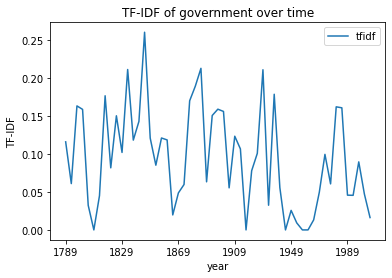

In [37]:
def plot_tfidf_over_time(word):
    ax = doc_word_tfidf_df[doc_word_tfidf_df['term'] == word].plot(kind='line', x='year', y='tfidf')
    ax.set_title(f"TF-IDF of {word} over time")
    ax.set_ylabel("TF-IDF")
    
plot_tfidf_over_time('government')

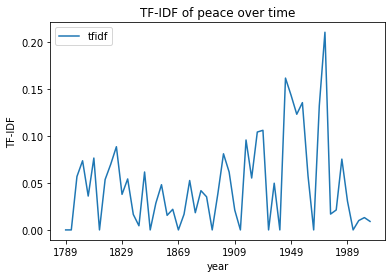

In [38]:
plot_tfidf_over_time('peace')

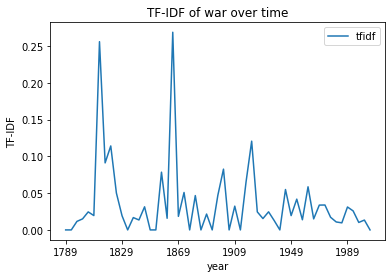

In [39]:
plot_tfidf_over_time('war')

(back to slides)
## Similar Addressess

In [45]:
tfidf_df.index

Index(['1797-John_Adams', '1937-Franklin_D._Roosevel', '1961-John_F._Kennedy',
       '1901-William_McKinley', '1957-Dwight_Eisenhower',
       '1805-Thomas_Jefferson', '1921-Warren_G._Harding',
       '1865-Abraham_Lincoln', '1917-Woodrow_Wilson', '1985-Ronald_Reagan',
       '1853-Franklin_Pierce', '1861-Abraham_Lincoln', '1981-Ronald_Reagan',
       '1833-Andrew_Jackson', '1837-Martin_Van_Buren',
       '1881-James_A._Garfield', '1873-Ulysses_S._Gran',
       '1877-Rutherford_B._Hayes', '2005-George_W._Bush',
       '1849-Zachary_Taylor', '1973-Richard_Nixon',
       '1933-Franklin_D._Roosevel', '1965-Lyndon_Johnson',
       '2001-George_W._Bush', '1989-George_H.W._Bush',
       '1825-John_Quincy_Adams', '1977-Jimmy_Carter', '1829-Andrew_Jackson',
       '1889-Benjamin_Harrison', '1905-Theodore_Roosevel',
       '1913-Woodrow_Wilson', '1809-James_Madison', '1969-Richard_Nixon',
       '1997-Bill_Clinton', '1993-Bill_Clinton', '1793-George_Washington',
       '1885-Grover_Cleveland',

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

In [49]:
#cosine_similarity(tfidf_df.loc['1861-Abraham_Lincoln'], tfidf_df.loc['1865-Abraham_Lincoln'])

In [50]:
similarity_df = pd.DataFrame(cosine_similarity(tfidf_df))
similarity_df.index =  tfidf_df.index
similarity_df.columns = tfidf_df.index
similarity_df

,1797-John_Adams,1937-Franklin_D._Roosevel,1961-John_F._Kennedy,1901-William_McKinley,1957-Dwight_Eisenhower,1805-Thomas_Jefferson,1921-Warren_G._Harding,1865-Abraham_Lincoln,1917-Woodrow_Wilson,1985-Ronald_Reagan,...,1897-William_McKinley,1929-Herbert_Hoover,1801-Thomas_Jefferson,1789-George_Washington,1945-Franklin_D._Roosevel,1813-James_Madison,1869-Ulysses_S._Gran,1925-Calvin_Coolidge,1857-James_Buchanan,1909-William_Howard_Taf
1797-John_Adams,1.000000,0.178972,0.116762,0.227170,0.155292,0.197887,0.174933,0.074784,0.153405,0.158303,...,0.265745,0.225871,0.208587,0.199585,0.083491,0.145700,0.165608,0.233972,0.291082,0.182483
1937-Franklin_D._Roosevel,0.178972,1.000000,0.138519,0.209732,0.186769,0.122430,0.247253,0.069128,0.183184,0.240828,...,0.191145,0.275801,0.143666,0.110113,0.163130,0.104110,0.105270,0.215437,0.183858,0.167714
1961-John_F._Kennedy,0.116762,0.138519,1.000000,0.119640,0.230603,0.118441,0.157914,0.118818,0.144740,0.221261,...,0.113539,0.147024,0.174317,0.095429,0.131217,0.110541,0.094771,0.162089,0.134560,0.109981
1901-William_McKinley,0.227170,0.209732,0.119640,1.000000,0.169225,0.169052,0.211338,0.103382,0.171967,0.180094,...,0.339467,0.246879,0.171520,0.152270,0.099734,0.145879,0.154238,0.256813,0.256669,0.244668
1957-Dwight_Eisenhower,0.155292,0.186769,0.230603,0.169225,1.000000,0.126771,0.243080,0.083733,0.210904,0.257626,...,0.160501,0.208209,0.144009,0.068041,0.180166,0.078808,0.100061,0.235094,0.146006,0.125395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813-James_Madison,0.145700,0.104110,0.110541,0.145879,0.078808,0.123508,0.139715,0.107420,0.102945,0.078267,...,0.152281,0.124836,0.120918,0.112961,0.052054,1.000000,0.087364,0.143063,0.156738,0.116177
1869-Ulysses_S._Gran,0.165608,0.105270,0.094771,0.154238,0.100061,0.157605,0.111294,0.074089,0.086076,0.111305,...,0.231424,0.185679,0.140103,0.117895,0.046997,0.087364,1.000000,0.198357,0.220931,0.184648
1925-Calvin_Coolidge,0.233972,0.215437,0.162089,0.256813,0.235094,0.194075,0.288653,0.086132,0.209502,0.226992,...,0.308888,0.330921,0.200130,0.151219,0.121565,0.143063,0.198357,1.000000,0.250648,0.292104
1857-James_Buchanan,0.291082,0.183858,0.134560,0.256669,0.146006,0.223262,0.169236,0.140516,0.168671,0.174641,...,0.347772,0.219022,0.236551,0.199787,0.116793,0.156738,0.220931,0.250648,1.000000,0.260679


**Question:** Which two speeches are the most similar?

In [51]:
for key in similarity_df:
    similarity_df[key]
    sorted_similar_speeches = similarity_df[key].sort_values(ascending=False)
    print(f"{sorted_similar_speeches.index[1]} is the most similar speech to {key} with a cosine similarity of\
    {sorted_similar_speeches[1]}")


1841-William_Henry_Harrison is the most similar speech to 1797-John_Adams with a cosine similarity of    0.32794718029413866
1929-Herbert_Hoover is the most similar speech to 1937-Franklin_D._Roosevel with a cosine similarity of    0.27580131057505164
1973-Richard_Nixon is the most similar speech to 1961-John_F._Kennedy with a cosine similarity of    0.28154739868062056
1897-William_McKinley is the most similar speech to 1901-William_McKinley with a cosine similarity of    0.3394665694941573
1953-Dwight_Eisenhower is the most similar speech to 1957-Dwight_Eisenhower with a cosine similarity of    0.33756959067236975
1845-James_Polk is the most similar speech to 1805-Thomas_Jefferson with a cosine similarity of    0.2811938906888871
1929-Herbert_Hoover is the most similar speech to 1921-Warren_G._Harding with a cosine similarity of    0.2998223247399414
1857-James_Buchanan is the most similar speech to 1865-Abraham_Lincoln with a cosine similarity of    0.14051586018043588
1953-Dwight_E

In [53]:
sorted_similar_speeches = similarity_df[key].sort_values(ascending=False)
sorted_similar_speeches[1]
sorted_similar_speeches.index[1], key

('1897-William_McKinley', '1909-William_Howard_Taf')

**Question:** Which speech was most similar to Kennedy's famous "Ask not what your country can do for you"?

In [54]:
similarity_df.sort_values('1961-John_F._Kennedy', ascending=False).index

Index(['1961-John_F._Kennedy', '1973-Richard_Nixon', '1993-Bill_Clinton',
       '1969-Richard_Nixon', '1997-Bill_Clinton', '1957-Dwight_Eisenhower',
       '1981-Ronald_Reagan', '1953-Dwight_Eisenhower', '1985-Ronald_Reagan',
       '1989-George_H.W._Bush', '1949-Harry_Truman', '2005-George_W._Bush',
       '1977-Jimmy_Carter', '1965-Lyndon_Johnson', '2001-George_W._Bush',
       '1801-Thomas_Jefferson', '1925-Calvin_Coolidge',
       '1881-James_A._Garfield', '1921-Warren_G._Harding',
       '1853-Franklin_Pierce', '1841-William_Henry_Harrison',
       '1929-Herbert_Hoover', '1917-Woodrow_Wilson',
       '1941-Franklin_D._Roosevel', '1937-Franklin_D._Roosevel',
       '1857-James_Buchanan', '1945-Franklin_D._Roosevel',
       '1905-Theodore_Roosevel', '1933-Franklin_D._Roosevel',
       '1837-Martin_Van_Buren', '1845-James_Polk', '1877-Rutherford_B._Hayes',
       '1901-William_McKinley', '1865-Abraham_Lincoln',
       '1805-Thomas_Jefferson', '1889-Benjamin_Harrison', '1817-James_Mo

In [55]:
doc_word_tfidf_df[doc_word_tfidf_df['document'] == '1973-Richard_Nixon']

,document,term,tfidf,year
173262,1973-Richard_Nixon,america,0.316735,1973
177490,1973-Richard_Nixon,let,0.288546,1973
178433,1973-Richard_Nixon,peace,0.210632,1973
179608,1973-Richard_Nixon,role,0.205902,1973
181444,1973-Richard_Nixon,world,0.179052,1973
...,...,...,...,...
181498,1973-Richard_Nixon,youthful,0.000000,1973
181499,1973-Richard_Nixon,zeal,0.000000,1973
181500,1973-Richard_Nixon,zealous,0.000000,1973
181501,1973-Richard_Nixon,zealously,0.000000,1973


In [56]:
doc_word_tfidf_df[doc_word_tfidf_df['document'] == '1961-John_F._Kennedy']

,document,term,tfidf,year
21916,1961-John_F._Kennedy,let,0.272425,1961
24357,1961-John_F._Kennedy,sides,0.257225,1961
23018,1961-John_F._Kennedy,pledge,0.163741,1961
18127,1961-John_F._Kennedy,begin,0.109095,1961
17897,1961-John_F._Kennedy,ask,0.106663,1961
...,...,...,...,...
25924,1961-John_F._Kennedy,youthful,0.000000,1961
25925,1961-John_F._Kennedy,zeal,0.000000,1961
25926,1961-John_F._Kennedy,zealous,0.000000,1961
25927,1961-John_F._Kennedy,zealously,0.000000,1961


In [57]:
doc_word_tfidf_df[doc_word_tfidf_df['document'] == '1993-Bill_Clinton']

,document,term,tfidf,year
294264,1993-Bill_Clinton,america,0.310759,1993
302446,1993-Bill_Clinton,world,0.227725,1993
294267,1993-Bill_Clinton,americans,0.195006,1993
301683,1993-Bill_Clinton,today,0.177102,1993
295072,1993-Bill_Clinton,change,0.173114,1993
...,...,...,...,...
302500,1993-Bill_Clinton,youthful,0.000000,1993
302501,1993-Bill_Clinton,zeal,0.000000,1993
302502,1993-Bill_Clinton,zealous,0.000000,1993
302503,1993-Bill_Clinton,zealously,0.000000,1993


In [ ]:
open("data/inaugural_speeches/1973-Richard_Nixon.txt").read()

## Homework 02

Analyzing NYTimes obituaries using tf-idf

### Questions for homework

Are your findings robust to:
1. Stopwords
1. lemmatization
1. stemming